In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
X = data.loc[:,"Time":"Amount"]
Y = data["Class"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)

In [6]:
print(X_train.head())

            Time        V1        V2        V3        V4        V5        V6  \
9341     13558.0  1.148607 -0.004154 -0.231106  1.124256  0.696077  1.177523   
210529  138022.0 -0.910538 -0.971254  1.033829 -1.514111 -1.068542  0.148626   
51525    44997.0  1.222501  0.491904 -0.082522  0.987913  0.164676 -0.845453   
128333   78673.0  1.184303 -0.066290  0.400333 -0.048278 -0.447460 -0.521259   
252025  155618.0 -0.484059  0.439377 -2.033102 -3.398765  2.209264  3.175789   

              V7        V8        V9  ...       V20       V21       V22  \
9341   -0.160142  0.201478  1.568269  ... -0.122816 -0.294334 -0.550620   
210529 -0.660712  0.694582 -0.563151  ...  0.362532  0.183422  0.082033   
51525   0.515114 -0.258261 -0.667442  ... -0.076698  0.068123  0.244725   
128333 -0.103204 -0.044640 -0.032670  ...  0.041195 -0.268415 -0.900138   
252025 -0.566306  0.423994 -1.281704  ... -0.171988  1.344784  1.271853   

             V23       V24       V25       V26       V27       V28  

In [7]:
n_frauds = Y.value_counts()[1]
n_not_frauds = Y.value_counts()[0]
print(f"Number of fraudulent transactions: {n_frauds}")
print(f"Number of normal transactions: {n_not_frauds}")
print(f"Percentage of fraudulent transactions: {n_frauds/(n_frauds+n_not_frauds) * 100} %")

Number of fraudulent transactions: 492
Number of normal transactions: 284315
Percentage of fraudulent transactions: 0.1727485630620034 %


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer([("Scaler", StandardScaler(), ["Time", "Amount"])], remainder="passthrough")
col_trans.fit(X_train)
X_train_scaled = pd.DataFrame(col_trans.transform(X_train), columns=X_train.columns)

In [9]:
print(X_train_scaled.head())

       Time        V1        V2        V3        V4        V5        V6  \
0 -1.707583 -0.119625  1.148607 -0.004154 -0.231106  1.124256  0.696077   
1  0.911438  0.214341 -0.910538 -0.971254  1.033829 -1.514111 -1.068542   
2 -1.046031 -0.322844  1.222501  0.491904 -0.082522  0.987913  0.164676   
3 -0.337407 -0.194817  1.184303 -0.066290  0.400333 -0.048278 -0.447460   
4  1.281701 -0.294807 -0.484059  0.439377 -2.033102 -3.398765  2.209264   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  1.177523 -0.160142  0.201478  ...  0.360271 -0.122816 -0.294334 -0.550620   
1  0.148626 -0.660712  0.694582  ...  1.073261  0.362532  0.183422  0.082033   
2 -0.845453  0.515114 -0.258261  ...  0.029591 -0.076698  0.068123  0.244725   
3 -0.521259 -0.103204 -0.044640  ...  0.486907  0.041195 -0.268415 -0.900138   
4  3.175789 -0.566306  0.423994  ... -0.509811 -0.171988  1.344784  1.271853   

        V24       V25       V26       V27       V28    Amount  
0 -0

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(X_train_scaled)

In [11]:
principal_com_df = pd.DataFrame(data= principal_components, columns = ['PC1', 'PC2'])

In [12]:
principal_com_df_with_gt = pd.concat([principal_com_df, Y_train], axis=1)

In [13]:
principal_com_df_with_gt.head()

,PC1,PC2,Class
0,-0.973963,0.117886,NaN
1,0.982758,0.605144,0.0
2,-1.212683,-0.329954,0.0
3,-1.128000,0.135391,0.0
4,0.116393,-0.409951,0.0


In [14]:
import matplotlib.pyplot as plt

In [15]:
print(principal_com_df_with_gt.shape)

(273311, 3)


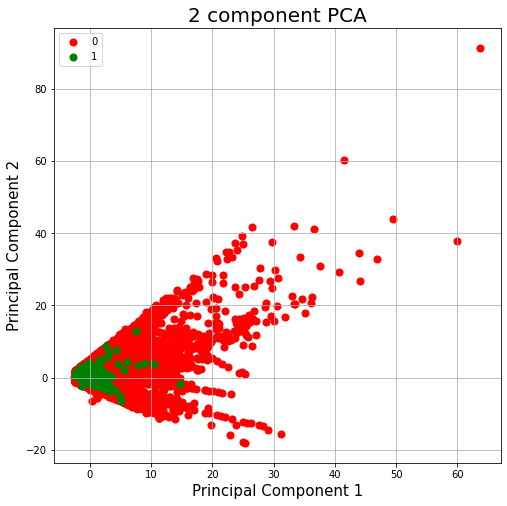

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principal_com_df_with_gt['Class'] == target
    ax.scatter(principal_com_df_with_gt.loc[indicesToKeep, 'PC1']
               , principal_com_df_with_gt.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<AxesSubplot:>

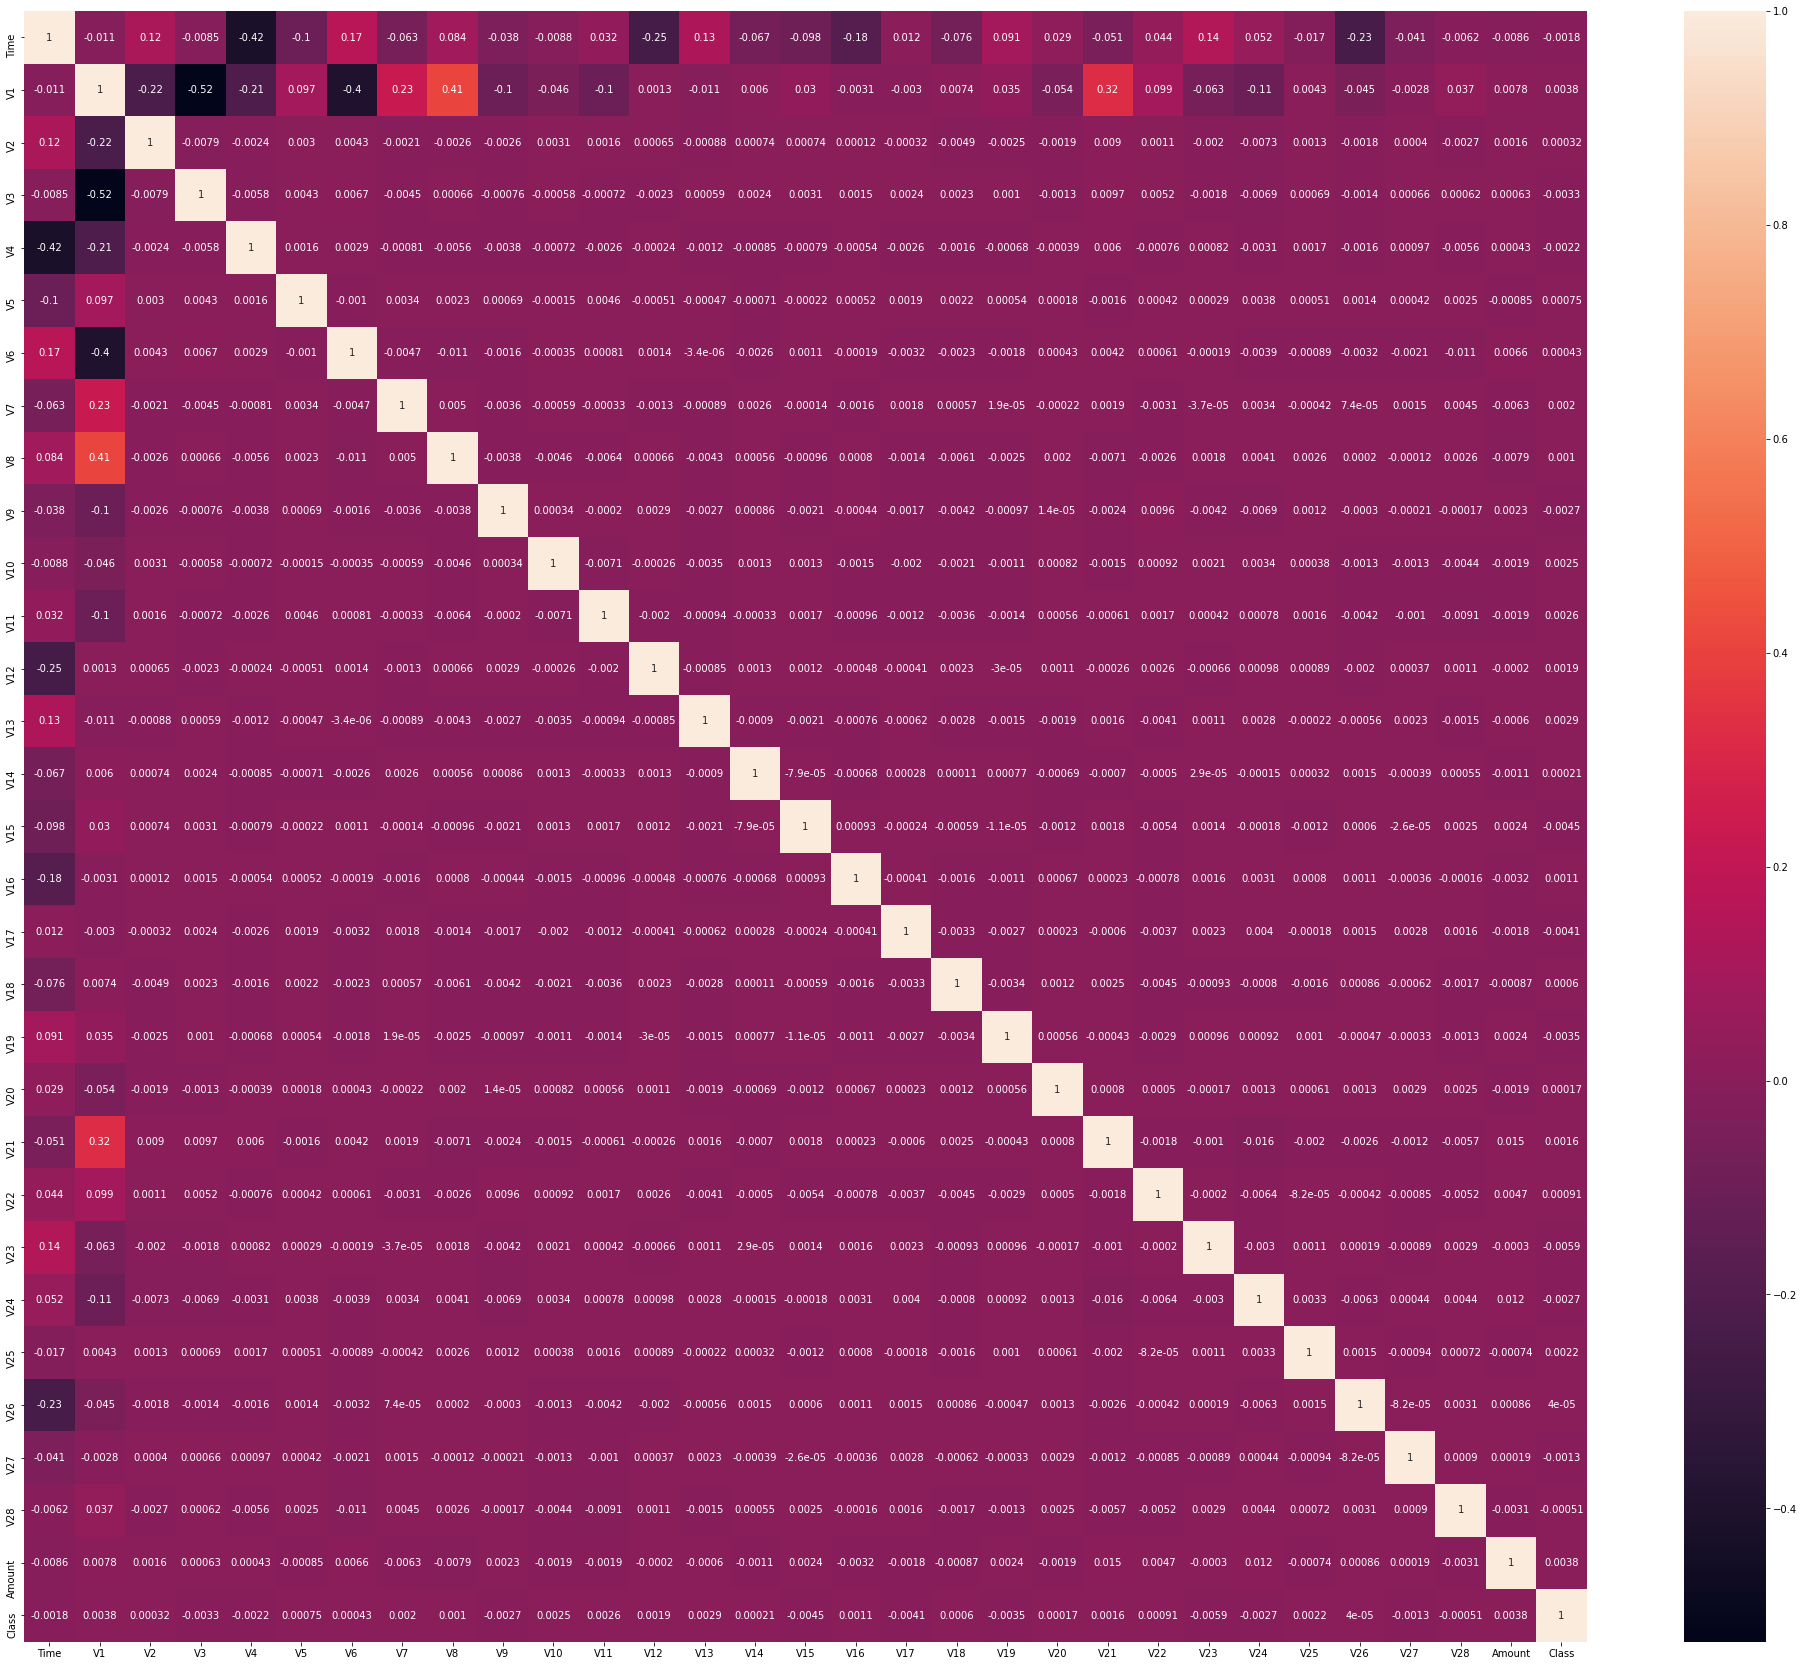

In [18]:
#Visualize correlation matrix
import seaborn as sn
fig, ax = plt.subplots(figsize=(35,30))         # Sample figsize in inches
correlation_matrix = pd.concat([X_train_scaled, Y_train], axis=1).corr()
sn.heatmap(correlation_matrix, annot=True)



# Let's explore how a simple Logistic Regression Model performs

In [19]:
n_frauds_train = Y_train.value_counts()[1]
n_not_frauds_train = Y_train.value_counts()[0]
n_frauds_test = Y_test.value_counts()[1]
n_not_frauds_test = Y_test.value_counts()[0]

print(f"Percentage of fraudulent transactions in training set: {n_frauds_train/(n_frauds_train+n_not_frauds_train) * 100} %")
print(f"Percentage of fraudulent transactions in test set: {n_frauds_test/(n_frauds_test+n_not_frauds_test) * 100} %")

Percentage of fraudulent transactions in training set: 0.17292457591783889 %
Percentage of fraudulent transactions in test set: 0.17204452090867595 %


In [20]:
print(n_frauds_train)
print(n_frauds_test)

394
98


In [21]:
from sklearn.linear_model import LogisticRegression

logistic_r = LogisticRegression()

logistic_r.fit(X_train_scaled, Y_train)

LogisticRegression()

In [24]:
print(f"Overall train accuracy is: {logistic_r.score(X_train_scaled, Y_train)*100:.2f}%")
X_test_scaled = col_trans.transform(X_test)
print(f"Overall test accuracy is: {logistic_r.score(X_test_scaled, Y_test)*100:.2f}%")


Overall train accuracy is: 99.92%
Overall test accuracy is: 99.93%


Confusion matrix, without normalization
[[56854    10]
 [   29    69]]
Normalized confusion matrix
[[1.00e+00 1.76e-04]
 [2.96e-01 7.04e-01]]


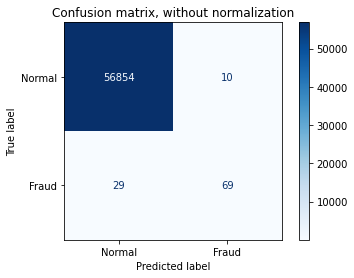

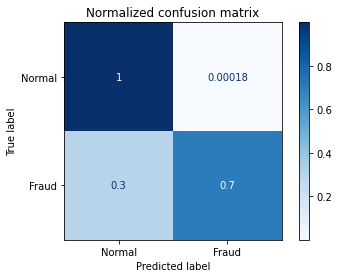

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_r, X_test_scaled, Y_test,
                                 display_labels=["Normal", "Fraud"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [26]:
from sklearn.metrics import f1_score
predicted_test = logistic_r.predict(X_test_scaled)
test_f1_score = f1_score(Y_test, predicted_test)
print(f"Test F1 score is {test_f1_score}")

from sklearn.metrics import average_precision_score
Y_score = logistic_r.decision_function(X_test_scaled)
average_precision = average_precision_score(Y_test, Y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Test F1 score is 0.7796610169491525
Average precision-recall score: 0.81


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.81')

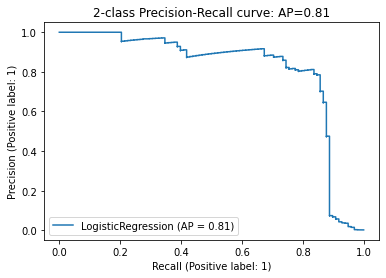

In [27]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(logistic_r, X_test_scaled, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [28]:
type(X)

pandas.core.frame.DataFrame

# Try same algorithm after we removed some of the least relevant features according to correlation matrix

In [29]:
irrelevant_features = ["Time", "V13", "V15", "V22", "V23", "V24", "V25", "V26", "V28"]

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns).drop(columns=irrelevant_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns).drop(columns=irrelevant_features)

print(X_train_scaled.shape)

(227845, 21)


Overall train accuracy is: 99.91265992231561%
Overall test accuracy is: 99.93504441557529%
Confusion matrix, without normalization
[[56858     6]
 [   31    67]]
Normalized confusion matrix
[[1.00e+00 1.06e-04]
 [3.16e-01 6.84e-01]]


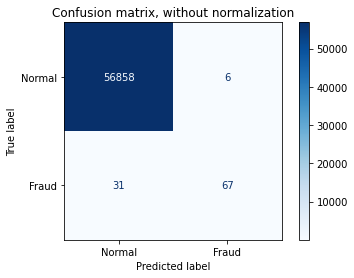

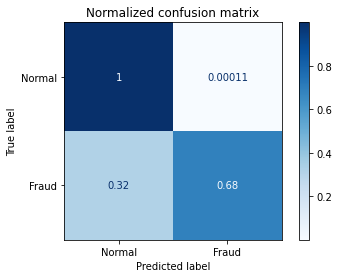

Test F1 score is 0.7836257309941519
Average precision-recall score: 0.81


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.81')

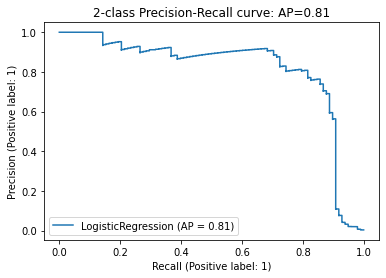

In [30]:
logistic_r = LogisticRegression()

logistic_r.fit(X_train_scaled, Y_train)

print(f"Overall train accuracy is: {logistic_r.score(X_train_scaled, Y_train)*100}%")
print(f"Overall test accuracy is: {logistic_r.score(X_test_scaled, Y_test)*100}%")

# Plot non-normalized confusion matrix

for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_r, X_test_scaled, Y_test,
                                 display_labels=["Normal", "Fraud"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

predicted_test = logistic_r.predict(X_test_scaled)
test_f1_score = f1_score(Y_test, predicted_test)
print(f"Test F1 score is {test_f1_score}")

Y_score = logistic_r.decision_function(X_test_scaled)
average_precision = average_precision_score(Y_test, Y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(logistic_r, X_test_scaled, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))



# Now let's try Support Vector Machines

In [31]:
# We'll use cross validation to evaluate the performance of our model

from sklearn.model_selection import StratifiedShuffleSplit
n_splits = 5
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2)

In [32]:
X_train_scaled = pd.DataFrame(col_trans.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(col_trans.transform(X_test), columns=X_train.columns)

print(X_train.shape)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(227845, 30)
(227845, 30)
(56962, 30)


In [30]:
for train_index, test_index in sss.split(X_train_scaled.values, Y_train.values):
    X_train_cv, X_val_cv = X_train_scaled.values[train_index], X_train_scaled.values[test_index]
    Y_train_cv, Y_val_cv = Y_train.values[train_index], Y_train.values[test_index]
    print("X_train_cv shape: ", X_train_cv.shape)
    print("X_val_cv shape: ", X_val_cv.shape)
    print("Fraud examples Y_train_cv:",  np.count_nonzero(Y_train_cv == 1))
    print("Fraud examples Y_val_cv:",  np.count_nonzero(Y_val_cv == 1))

X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79
X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79
X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79
X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79
X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79


In [36]:
from sklearn.svm import SVC

## Check validation accuracy using cross-fold validation

In [ ]:
sum_acc = 0
sum_f1 = 0
idx = 1
for train_index, val_index in sss.split(X_train_scaled.values, Y_train.values):
    X_train_cv, X_val_cv = X_train_scaled.values[train_index], X_train_scaled.values[val_index]
    Y_train_cv, Y_val_cv = Y_train.values[train_index], Y_train.values[val_index]
    svc = SVC(class_weight="balanced", random_state=10)
    svc.fit(X_train_cv, Y_train_cv)
    train_acc = svc.score(X_train_cv, Y_train_cv)*100
    val_acc = svc.score(X_val_cv, Y_val_cv)*100
    print(f"Train accuracy batch {idx}: {train_acc}%")
    print(f"Val accuracy batch {idx}: {val_acc}%")
    predicted_probs = svc.predict(X_val_cv)
    pred_f1_score = f1_score(Y_val_cv, predicted_probs)
    print(f"Val F1 score: {pred_f1_score}")
    sum_acc += val_acc
    sum_f1 += pred_f1_score
    idx +=1
    
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(svc, X_val_cv, Y_val_cv,
                                     display_labels=["Normal", "Fraud"],
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        
print(f"Average test accuracy is {sum_acc/ n_splits}")
print(f"Average test f1 score is {sum_f1/ n_splits}")
        

    

    


In [33]:
#Now train model on full dataset and save it
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

X = data.loc[:,"Time":"Amount"]
Y = data["Class"]
print(X.shape)
print(Y.shape)

col_trans = ColumnTransformer([("Scaler", StandardScaler(), ["Time", "Amount"])], remainder="passthrough")

col_trans.fit(X_train)
X_train_scaled = col_trans.transform(X_train)
X_test_scaled = col_trans.transform(X_test)
print(X_train_scaled.shape)
print(X_train_scaled[1000:1001])

(284807, 30)
(284807,)
(227845, 30)
[[ 1.13 -0.27  2.01 -0.31 -1.45  0.29 -0.15 -1.08  0.1  -0.22  0.45  0.33
   0.65  0.22 -1.47  0.79 -0.61 -0.13 -0.36  0.29  0.17 -0.26  0.39  1.22
  -0.11  0.16  0.25  0.99 -0.11 -0.09]]


In [34]:
print(X_train_scaled[1])
print(X_test_scaled[1])

[ 0.91  0.21 -0.91 -0.97  1.03 -1.51 -1.07  0.15 -0.66  0.69 -0.56 -0.4
 -0.06  0.26  0.11 -0.56 -2.04  1.31  0.21 -0.79  1.07  0.36  0.18  0.08
  0.25 -0.35 -0.05 -0.37 -0.13 -0.16]
[ 0.55 -0.06  1.91 -0.04 -1.96  0.4   0.37 -0.97  0.27 -0.25  0.33 -0.38
  1.05  0.67  0.11 -0.67  0.23  0.55  0.08  1.17 -0.03 -0.03  0.26  0.74
 -0.15 -0.47  0.25 -0.1  -0.02 -0.03]


In [37]:
svc = SVC(class_weight="balanced", random_state=10)
svc.fit(X_train_scaled, Y_train)

SVC(class_weight='balanced', random_state=10)

F1 score: 0.48648648648648646


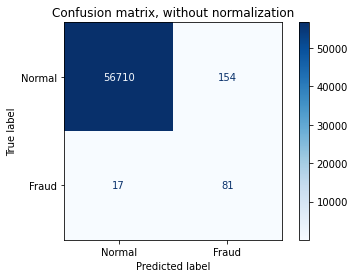

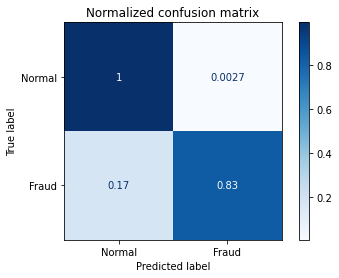

In [38]:
predicted_probs = svc.predict(X_test_scaled)
pred_f1_score = f1_score(Y_test, predicted_probs)
print(f"F1 score: {pred_f1_score}")

titles_options = [("Confusion matrix, without normalization", None),
              ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test_scaled, Y_test,
                                 display_labels=["Normal", "Fraud"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

In [43]:
pipeline = Pipeline([("Scaler", col_trans), ("Classifier", svc)])

In [44]:
from joblib import dump, load

dump(pipeline, "svc.joblib")


['svc.joblib']

In [45]:
X = data.loc[:,"Time":"Amount"]
Y = data["Class"]
test_input = X.loc[10:10]
print(test_input.to_dict(orient="records")[0])
class_pred = pipeline.predict(test_input)
print(class_pred)

{'Time': 10.0, 'V1': 1.44904378114715, 'V2': -1.17633882535966, 'V3': 0.913859832832795, 'V4': -1.37566665499943, 'V5': -1.97138316545323, 'V6': -0.62915213889734, 'V7': -1.4232356010359, 'V8': 0.0484558879088564, 'V9': -1.72040839292037, 'V10': 1.62665905834133, 'V11': 1.1996439495421, 'V12': -0.671439778462005, 'V13': -0.513947152539479, 'V14': -0.0950450453999549, 'V15': 0.230930409124119, 'V16': 0.0319674667862076, 'V17': 0.253414715863197, 'V18': 0.854343814324194, 'V19': -0.221365413645481, 'V20': -0.387226474431156, 'V21': -0.0093018965249005, 'V22': 0.313894410791098, 'V23': 0.0277401580170247, 'V24': 0.500512287104917, 'V25': 0.25136735874921, 'V26': -0.129477953726618, 'V27': 0.0428498709381461, 'V28': 0.0162532619375515, 'Amount': 7.8}
[0]


In [48]:
indices_fraud = list(Y_train[Y_train == True].index)
print(indices_fraud)

[6820, 144754, 150668, 88897, 191267, 154960, 102443, 41569, 69498, 44091, 251904, 10630, 258403, 6971, 163149, 281674, 58761, 83417, 149874, 276071, 177195, 143334, 123201, 42936, 281144, 221018, 623, 76609, 89190, 52466, 123301, 154684, 16780, 150669, 11343, 222133, 214662, 229712, 145800, 17453, 237426, 108258, 96789, 45732, 42609, 33276, 6734, 150692, 151103, 123238, 151196, 42784, 30384, 235644, 280143, 30100, 16415, 27749, 204064, 146790, 251881, 183106, 93424, 59539, 245556, 150678, 182992, 68522, 249607, 149357, 124115, 243699, 197586, 12070, 23422, 53794, 29687, 42958, 279863, 150601, 83053, 157918, 14211, 208651, 252124, 255556, 141259, 41395, 10801, 88307, 192529, 191544, 150684, 12369, 8335, 9035, 108708, 15736, 149587, 149600, 75511, 154693, 15781, 64411, 73857, 251866, 248296, 31002, 238222, 8296, 261925, 93788, 125342, 143333, 151730, 42700, 261056, 151009, 16863, 68067, 6331, 70141, 247673, 6427, 244004, 135718, 154694, 153835, 247995, 47802, 150680, 100623, 52521, 1407

In [52]:
print(X_train_scaled[6820])
print(Y_train[6820])

[ 1.13  0.36  1.92 -1.84 -0.9  -1.54 -1.25 -0.1  -0.96 -0.06 -1.54  1.55
  0.93  0.48  1.1  -0.4  -1.06 -0.4   0.33 -0.25  0.31 -0.03 -0.48 -1.33
  0.43  0.64 -0.7  -0.73 -0.01 -0.01]
1


# Now let's try a Gaussian Mixture Model

In [53]:
from sklearn.mixture import GaussianMixture

In [65]:
print(X_train_scaled.shape)
print(sum(Y_train==False))

(227845, 30)
227451


In [70]:
X_train_scaled_valid = X_train_scaled[Y_train==False]
print(X_train_scaled_valid.shape)
print(X_train_scaled_valid[0])

(227451, 30)
[-1.71e+00 -1.20e-01  1.15e+00 -4.15e-03 -2.31e-01  1.12e+00  6.96e-01
  1.18e+00 -1.60e-01  2.01e-01  1.57e+00 -3.20e-01  4.07e-01 -2.35e+00
  8.14e-01  1.79e+00 -1.30e+00 -1.92e-03  1.71e-01  4.78e-01  3.60e-01
 -1.23e-01 -2.94e-01 -5.51e-01 -3.10e-01 -1.77e+00  7.91e-01 -2.64e-01
 -8.49e-03 -1.13e-02]


In [76]:
gm = GaussianMixture(n_components=10, random_state=10)
gm.fit(X_train_scaled)


GaussianMixture(n_components=10, random_state=10)

In [77]:
few_fraud_examples_idx = indices_fraud[0:10]
few_fraud_examples = X_train_scaled[few_fraud_examples_idx]

In [80]:
gm.score_samples(few_fraud_examples)

array([ 60.6 ,  62.32,  11.75, -68.97,  63.3 ,  69.77,  21.82,  19.39,
       -21.07,  65.06])

In [81]:
from sklearn.ensemble import IsolationForest

In [82]:
contamination = 0.0017
isolation_f = IsolationForest(contamination=contamination, n_estimators=1000)

In [83]:
%%time
isolation_f.fit(X_train)

CPU times: user 1min 29s, sys: 4.89 s, total: 1min 34s
Wall time: 1min 34s


IsolationForest(contamination=0.0017, n_estimators=1000)

In [92]:
fraud_idx = list(Y_train[Y_train == True].index)

fraud_samples = X_train.loc[fraud_idx]
print(isolation_f.predict(fraud_samples))

[ 1  1 -1  1  1  1 -1  1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1 -1  1 -1
  1  1  1  1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1 -1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1
  1 -1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1  1 -1 -1  1 -1  1 -1  1  1
  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1  1 -1  1  1 -1
  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1  1
 -1  1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1
  1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1
 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1
  1  1 -1 -1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1